# Exercise 02 : Bar

In [8]:
import pandas as pd
import sqlite3

In [9]:
con = sqlite3.connect("../data/checking-logs.sqlite")

In [10]:
query = """
SELECT timestamp
FROM checker
WHERE uid LIKE 'user_%'
"""
checker = pd.io.sql.read_sql(query, con, parse_dates=['timestamp'])
checker['daytime'] = pd.cut(checker['timestamp'].dt.hour, 
                            bins=[0, 4, 10, 17, 24],
                            labels=['night', 'morning', 'afternoon', 'evening'],
                            right=False)
checker['timestamp'] = checker['timestamp'].dt.date
checker = checker.rename(columns={'timestamp': 'date'})
commits = checker.groupby('daytime', observed=False).value_counts().unstack(0)
commits

daytime,night,morning,afternoon,evening
date,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,33,35
2020-04-19,2,4,16,11
2020-04-20,0,0,12,13
2020-04-21,0,0,0,25
2020-04-22,0,0,4,24
2020-04-23,2,6,15,20
2020-04-24,0,0,4,12
2020-04-25,1,21,33,49


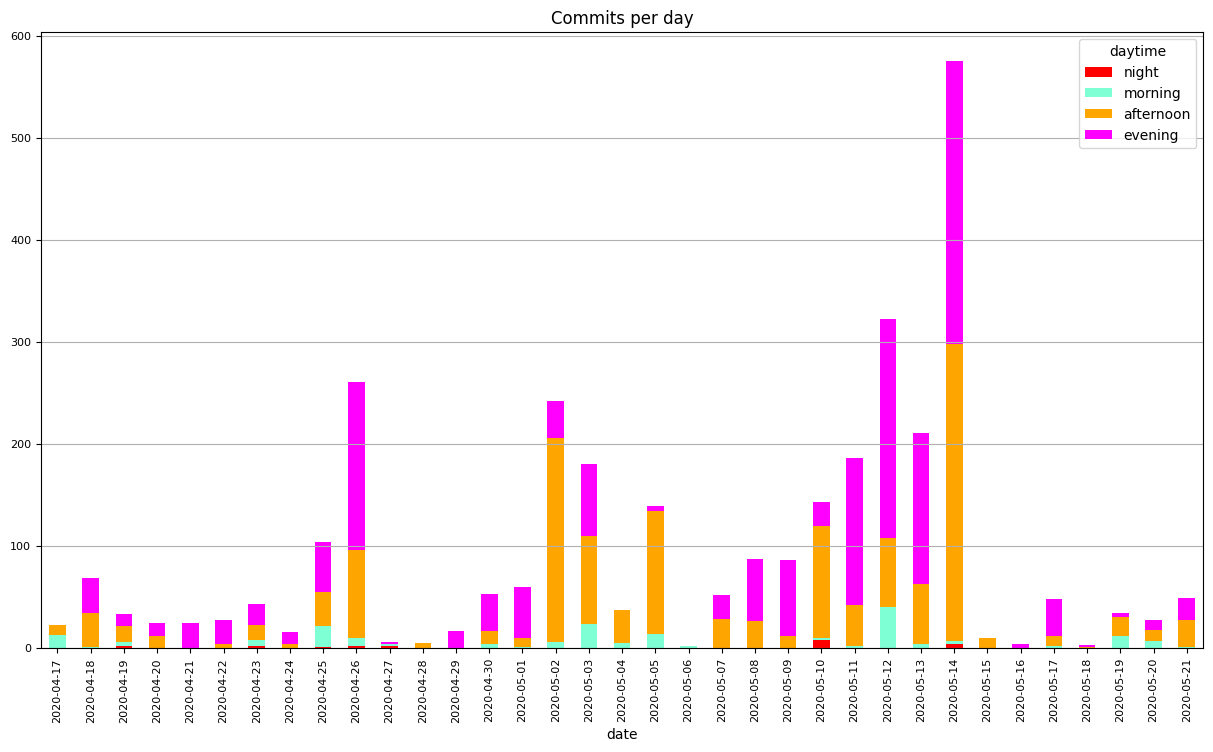

In [11]:
plot = commits.plot(kind='bar',
        fontsize=8, 
        figsize=(15, 8),
        title='Commits per day',
        rot=90,
        stacked=True,
        color=['red', 'aquamarine', 'orange', 'magenta']
        )
plot.grid(axis='y')

## When do our users usually commit the labs: in the night, morning, afternoon, or evening?

In [12]:
commits.sum()

daytime
night          21
morning       184
afternoon    1391
evening      1611
dtype: int64

## The answer is __evening__ and __afternoon__

---

## Which day has the most number of commits and at the same time, the number of commits in the evening is higher than in the afternoon?

In [13]:
print(commits[commits['evening'] > commits['afternoon']].sum(axis=1).idxmax())

2020-05-12


## The answer is __2020-05-12__

In [14]:
con.close()